In [505]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [506]:
DATA_FILE = r'..\Data\rm_working_files\right_move_data_final2.csv'

In [507]:
df = pd.read_csv(DATA_FILE,index_col=None)

In [508]:
df.head()

,price,bedrooms,address,latitude,longitude,propertyType,summary,bourough,outdoor space,postcode,postcode first section,nearest stattion,number of stops within 2kms,population,median wage,total number of schools_y,percentage attedning private school
0,795000,4,"nine ashes road, stondon massey, cm15",51.685028,0.291810,detached house,** looking for views over open countryside ** ...,brent,True,CM15 0ER,CM15,0.0,0,311200,22800,103,0.05
1,235000,1,"parkside, waltham cross, hertfordshire, en8",51.683050,-0.030570,apartment,fullers are proud to offer for sale this 1 bed...,enfield,False,EN8 7TH,EN8,0.0,0,312500,25100,109,0.03
2,415000,2,"soames mead, stondon massey, brentwood",51.682476,0.290965,bungalow,situated in a pleasant cul-de-sac is this two ...,brent,False,CM15 0EP,CM15,0.0,0,311200,22800,103,0.05
3,220000,1,"westgate court, waltham cross",51.681940,-0.034090,apartment,william h brown are delighted to bring to the ...,enfield,False,EN8 8RZ,EN8,0.0,0,312500,25100,109,0.03
4,415000,4,"holmesdale, waltham cross",51.681915,-0.041826,detached house,a four bedroom end of terrace property with sp...,enfield,True,EN8 8RF,EN8,0.0,0,312500,25100,109,0.03


In [509]:
# The mean price is a lot closer to the London avg (650k) - inital mean was closer to 2.5m
df.describe()

,price,bedrooms,latitude,longitude,nearest stattion,number of stops within 2kms,population,median wage,total number of schools_y,percentage attedning private school
count,1.444500e+04,14445.000000,14445.000000,14445.000000,14445.000000,14445.000000,14445.000000,14445.000000,14445.000000,14445.000000
mean,7.201592e+05,2.406646,51.519159,-0.108822,587.073937,6.081689,268413.298719,27523.634476,104.116857,0.112538
std,3.882185e+05,1.157416,0.073914,0.156086,525.400585,6.174097,57747.293575,3408.889604,24.628352,0.112936
min,1.800000e+05,0.000000,50.907840,-1.490800,0.000000,0.000000,7400.000000,22800.000000,5.000000,0.010000
25%,4.400000e+05,2.000000,51.468010,-0.195420,144.863890,1.000000,237200.000000,25400.000000,85.000000,0.050000
50%,6.400000e+05,2.000000,51.518253,-0.102050,468.276422,4.000000,258200.000000,27600.000000,104.000000,0.080000
75%,8.650000e+05,3.000000,51.576435,-0.034430,916.999344,10.000000,308000.000000,28700.000000,117.000000,0.120000
max,2.050000e+06,11.000000,51.685028,0.422580,1999.912849,31.000000,363400.000000,53200.000000,166.000000,0.900000


In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14445 entries, 0 to 14444
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   price                                14445 non-null  int64  
 1   bedrooms                             14445 non-null  int64  
 2   address                              14445 non-null  object 
 3   latitude                             14445 non-null  float64
 4   longitude                            14445 non-null  float64
 5   propertyType                         14445 non-null  object 
 6   summary                              14445 non-null  object 
 7   bourough                             14445 non-null  object 
 8   outdoor space                        14445 non-null  bool   
 9   postcode                             14445 non-null  object 
 10  postcode first section               14443 non-null  object 
 11  nearest stattion            

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'nearest stattion'}>,
        <AxesSubplot:title={'center':'number of stops within 2kms'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'median wage'}>,
        <AxesSubplot:title={'center':'total number of schools_y'}>],
       [<AxesSubplot:title={'center':'percentage attedning private school'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

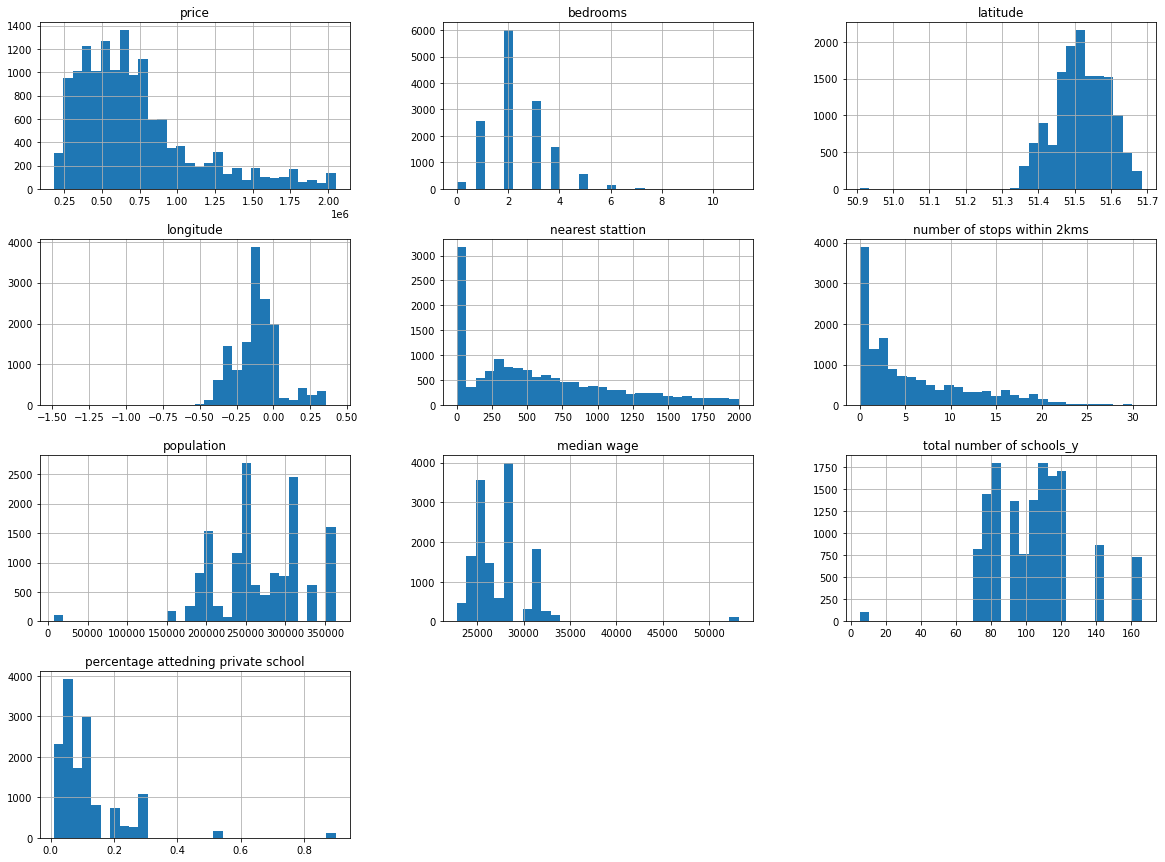

In [511]:

df.hist(bins=30, figsize=(20,15))

In [512]:
# it looks like price, number of stops within 2kms, nearest station have a right skew, indicating
# more outliars to the right

#Lets check the skewness values for each attribute


In [513]:
from scipy.stats import skew

price
1.2886415397081983


<Figure size 432x288 with 0 Axes>

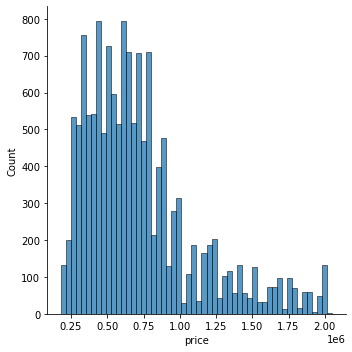

bedrooms
0.835368566951695


<Figure size 432x288 with 0 Axes>

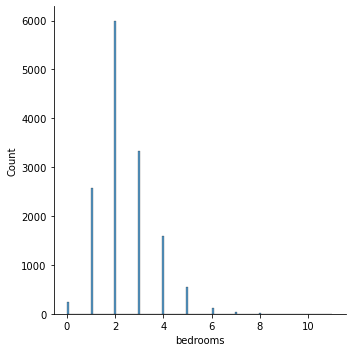

latitude
-0.5523694567201063


<Figure size 432x288 with 0 Axes>

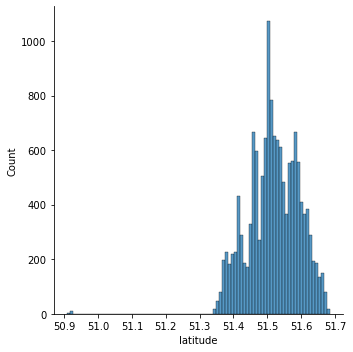

longitude
-0.06855569755804501


<Figure size 432x288 with 0 Axes>

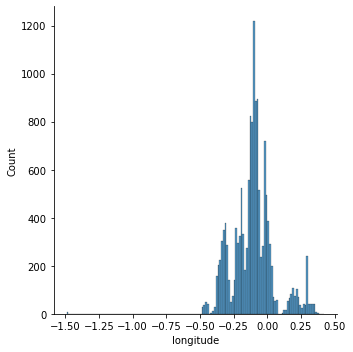

nearest stattion
0.7756108369364111


<Figure size 432x288 with 0 Axes>

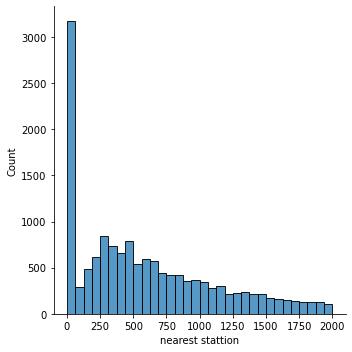

number of stops within 2kms
1.1195512029588992


<Figure size 432x288 with 0 Axes>

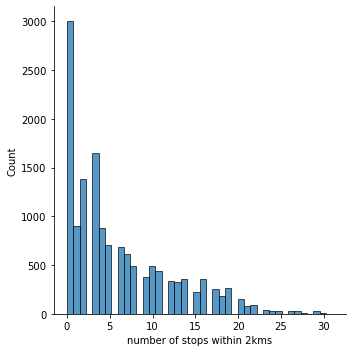

population
-0.5786205923271315


<Figure size 432x288 with 0 Axes>

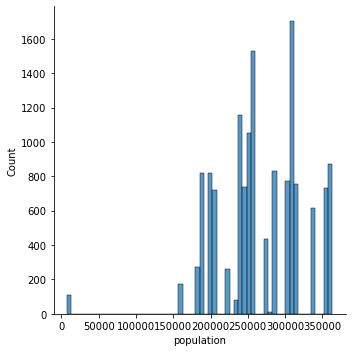

median wage
3.3026546583690166


<Figure size 432x288 with 0 Axes>

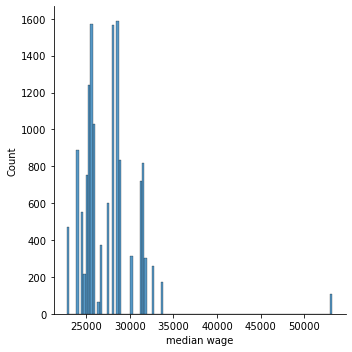

total number of schools_y
0.27416093590967333


<Figure size 432x288 with 0 Axes>

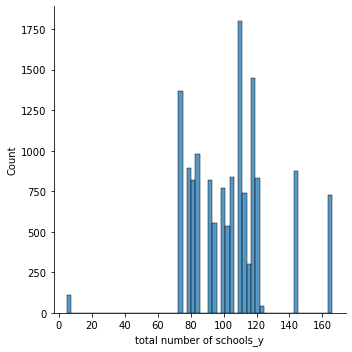

percentage attedning private school
3.366750582347879


<Figure size 432x288 with 0 Axes>

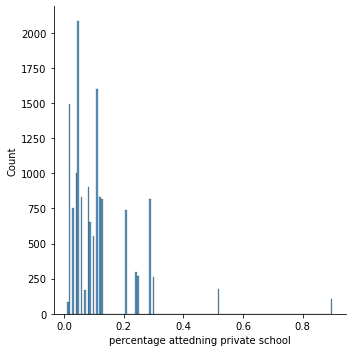

In [514]:
df_skew = df[['price', 'bedrooms', 'latitude', 'longitude', 'nearest stattion', 'number of stops within 2kms',
              'population', 'median wage', 'total number of schools_y', 'percentage attedning private school' ]]

for col in df_skew:
    print(col)
    print(skew(df_skew[col]))
    
    plt.figure()
    sns.displot(df_skew[col])
    plt.show()

In [515]:
# there is significant skewness (positive and negative) in these features 


In [516]:
# before addressing the skewness lets look at the correlation with these features and price

In [517]:
corr_matrix = df.corr()

In [518]:
corr_matrix.price.sort_values(ascending=False)

price                                  1.000000
bedrooms                               0.456850
median wage                            0.317133
percentage attedning private school    0.262812
number of stops within 2kms            0.219061
outdoor space                          0.023160
total number of schools_y              0.010287
nearest stattion                      -0.004762
latitude                              -0.021800
longitude                             -0.142283
population                            -0.171567
Name: price, dtype: float64

In [520]:
# There doesnt appear to be much of a correlation between price and any of these features so lets try removing the skewness 
#of price by applying a square root transformation


In [535]:
df.price = np.log(df.price)
print(skew(df.price))

0.1049810259868038


In [536]:
df

,price,bedrooms,address,latitude,longitude,propertyType,summary,bourough,outdoor space,postcode,postcode first section,nearest stattion,number of stops within 2kms,population,median wage,total number of schools_y,percentage attedning private school,price_1
0,13.586097,4,"nine ashes road, stondon massey, cm15",51.685028,0.291810,detached house,** looking for views over open countryside ** ...,brent,True,CM15 0ER,CM15,0.0,0,311200,22800,103,0.05,13.586097
1,12.367341,1,"parkside, waltham cross, hertfordshire, en8",51.683050,-0.030570,apartment,fullers are proud to offer for sale this 1 bed...,enfield,False,EN8 7TH,EN8,0.0,0,312500,25100,109,0.03,12.367341
2,12.936034,2,"soames mead, stondon massey, brentwood",51.682476,0.290965,bungalow,situated in a pleasant cul-de-sac is this two ...,brent,False,CM15 0EP,CM15,0.0,0,311200,22800,103,0.05,12.936034
3,12.301383,1,"westgate court, waltham cross",51.681940,-0.034090,apartment,william h brown are delighted to bring to the ...,enfield,False,EN8 8RZ,EN8,0.0,0,312500,25100,109,0.03,12.301383
4,12.936034,4,"holmesdale, waltham cross",51.681915,-0.041826,detached house,a four bedroom end of terrace property with sp...,enfield,True,EN8 8RF,EN8,0.0,0,312500,25100,109,0.03,12.936034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14440,12.388394,2,"junction road, totton, southampton",50.917860,-1.487400,apartment,juliet balcony and ensuite ** brand new develo...,redbridge,True,SO40 3BU,SO40,0.0,0,279000,26800,95,0.07,12.388394
14441,12.429216,2,"junction road, totton, southampton",50.917860,-1.487400,apartment,last ground floor plot with garden ** brand ne...,redbridge,True,SO40 3BU,SO40,0.0,0,279000,26800,95,0.07,12.429216
14442,12.409013,3,totton,50.917790,-1.485022,terraced house,situated in a convenient central location with...,redbridge,True,SO40 3AE,SO40,0.0,0,279000,26800,95,0.07,12.409013
14443,12.765688,2,"homeway cottages, eling hill, totton, southamp...",50.908024,-1.478482,terraced house,a charming mid-terrace grade ii listed cottage...,redbridge,True,SO40 9JQ,SO40,0.0,0,279000,26800,95,0.07,12.765688


In [502]:
df['nearest stattion'] = np.sqrt(df['nearest stattion'])
print(skew(df['nearest stattion']))

-0.22528923493764486


<AxesSubplot:>

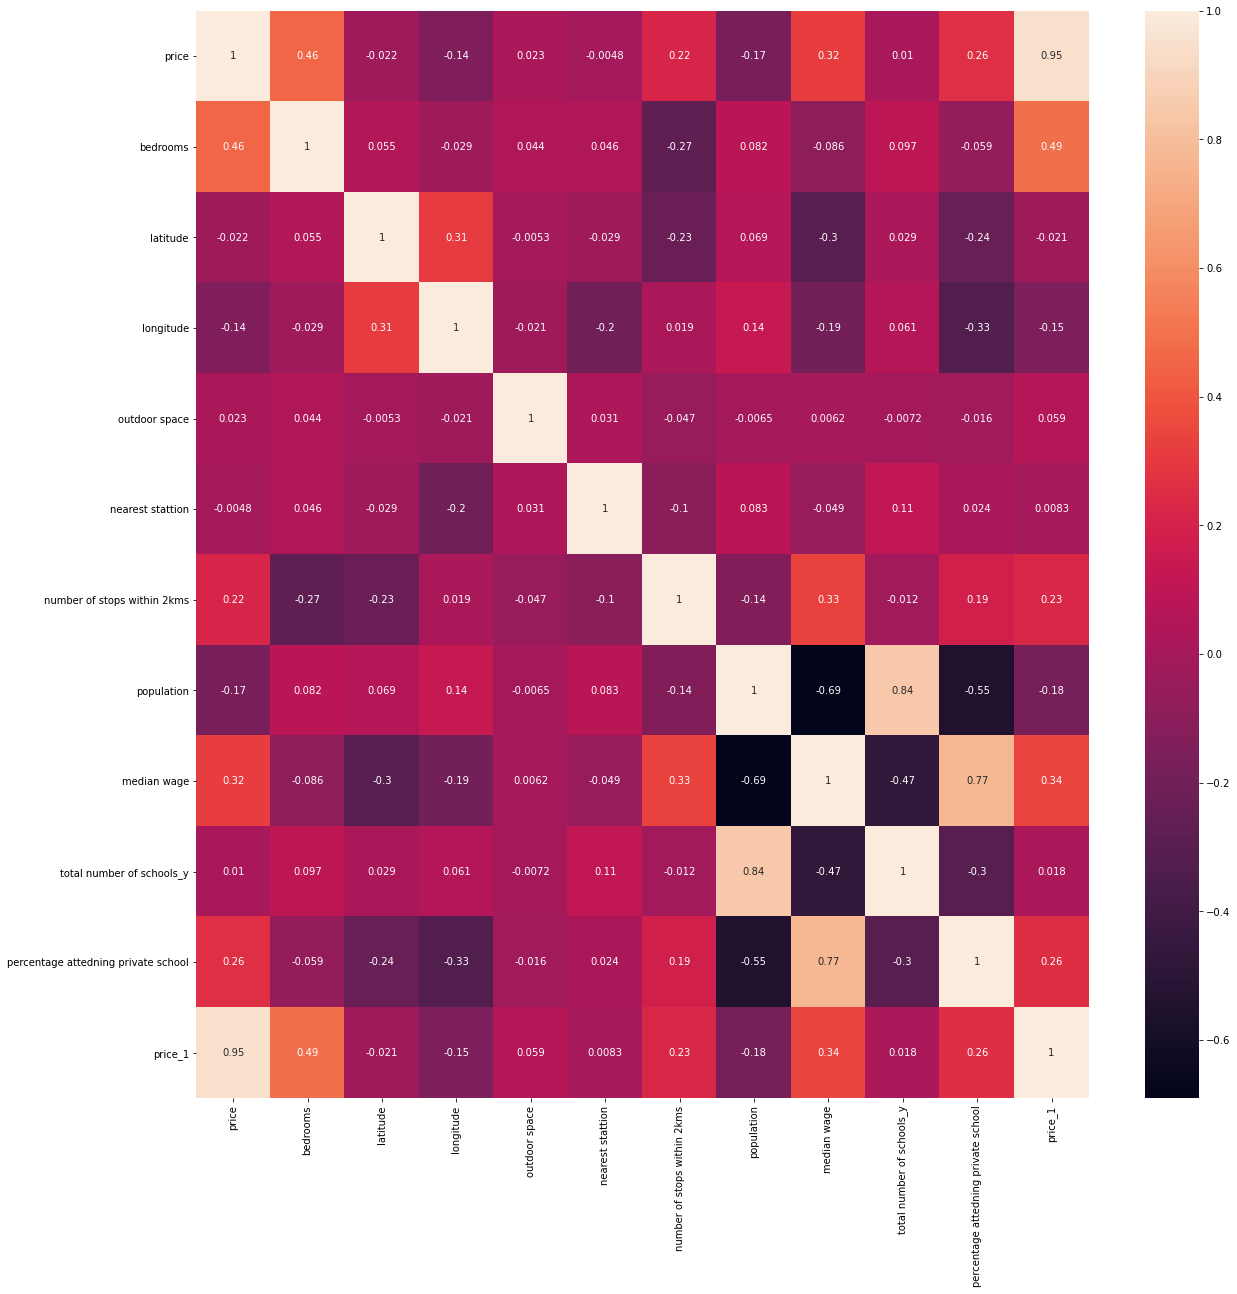

In [534]:
corr_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True)

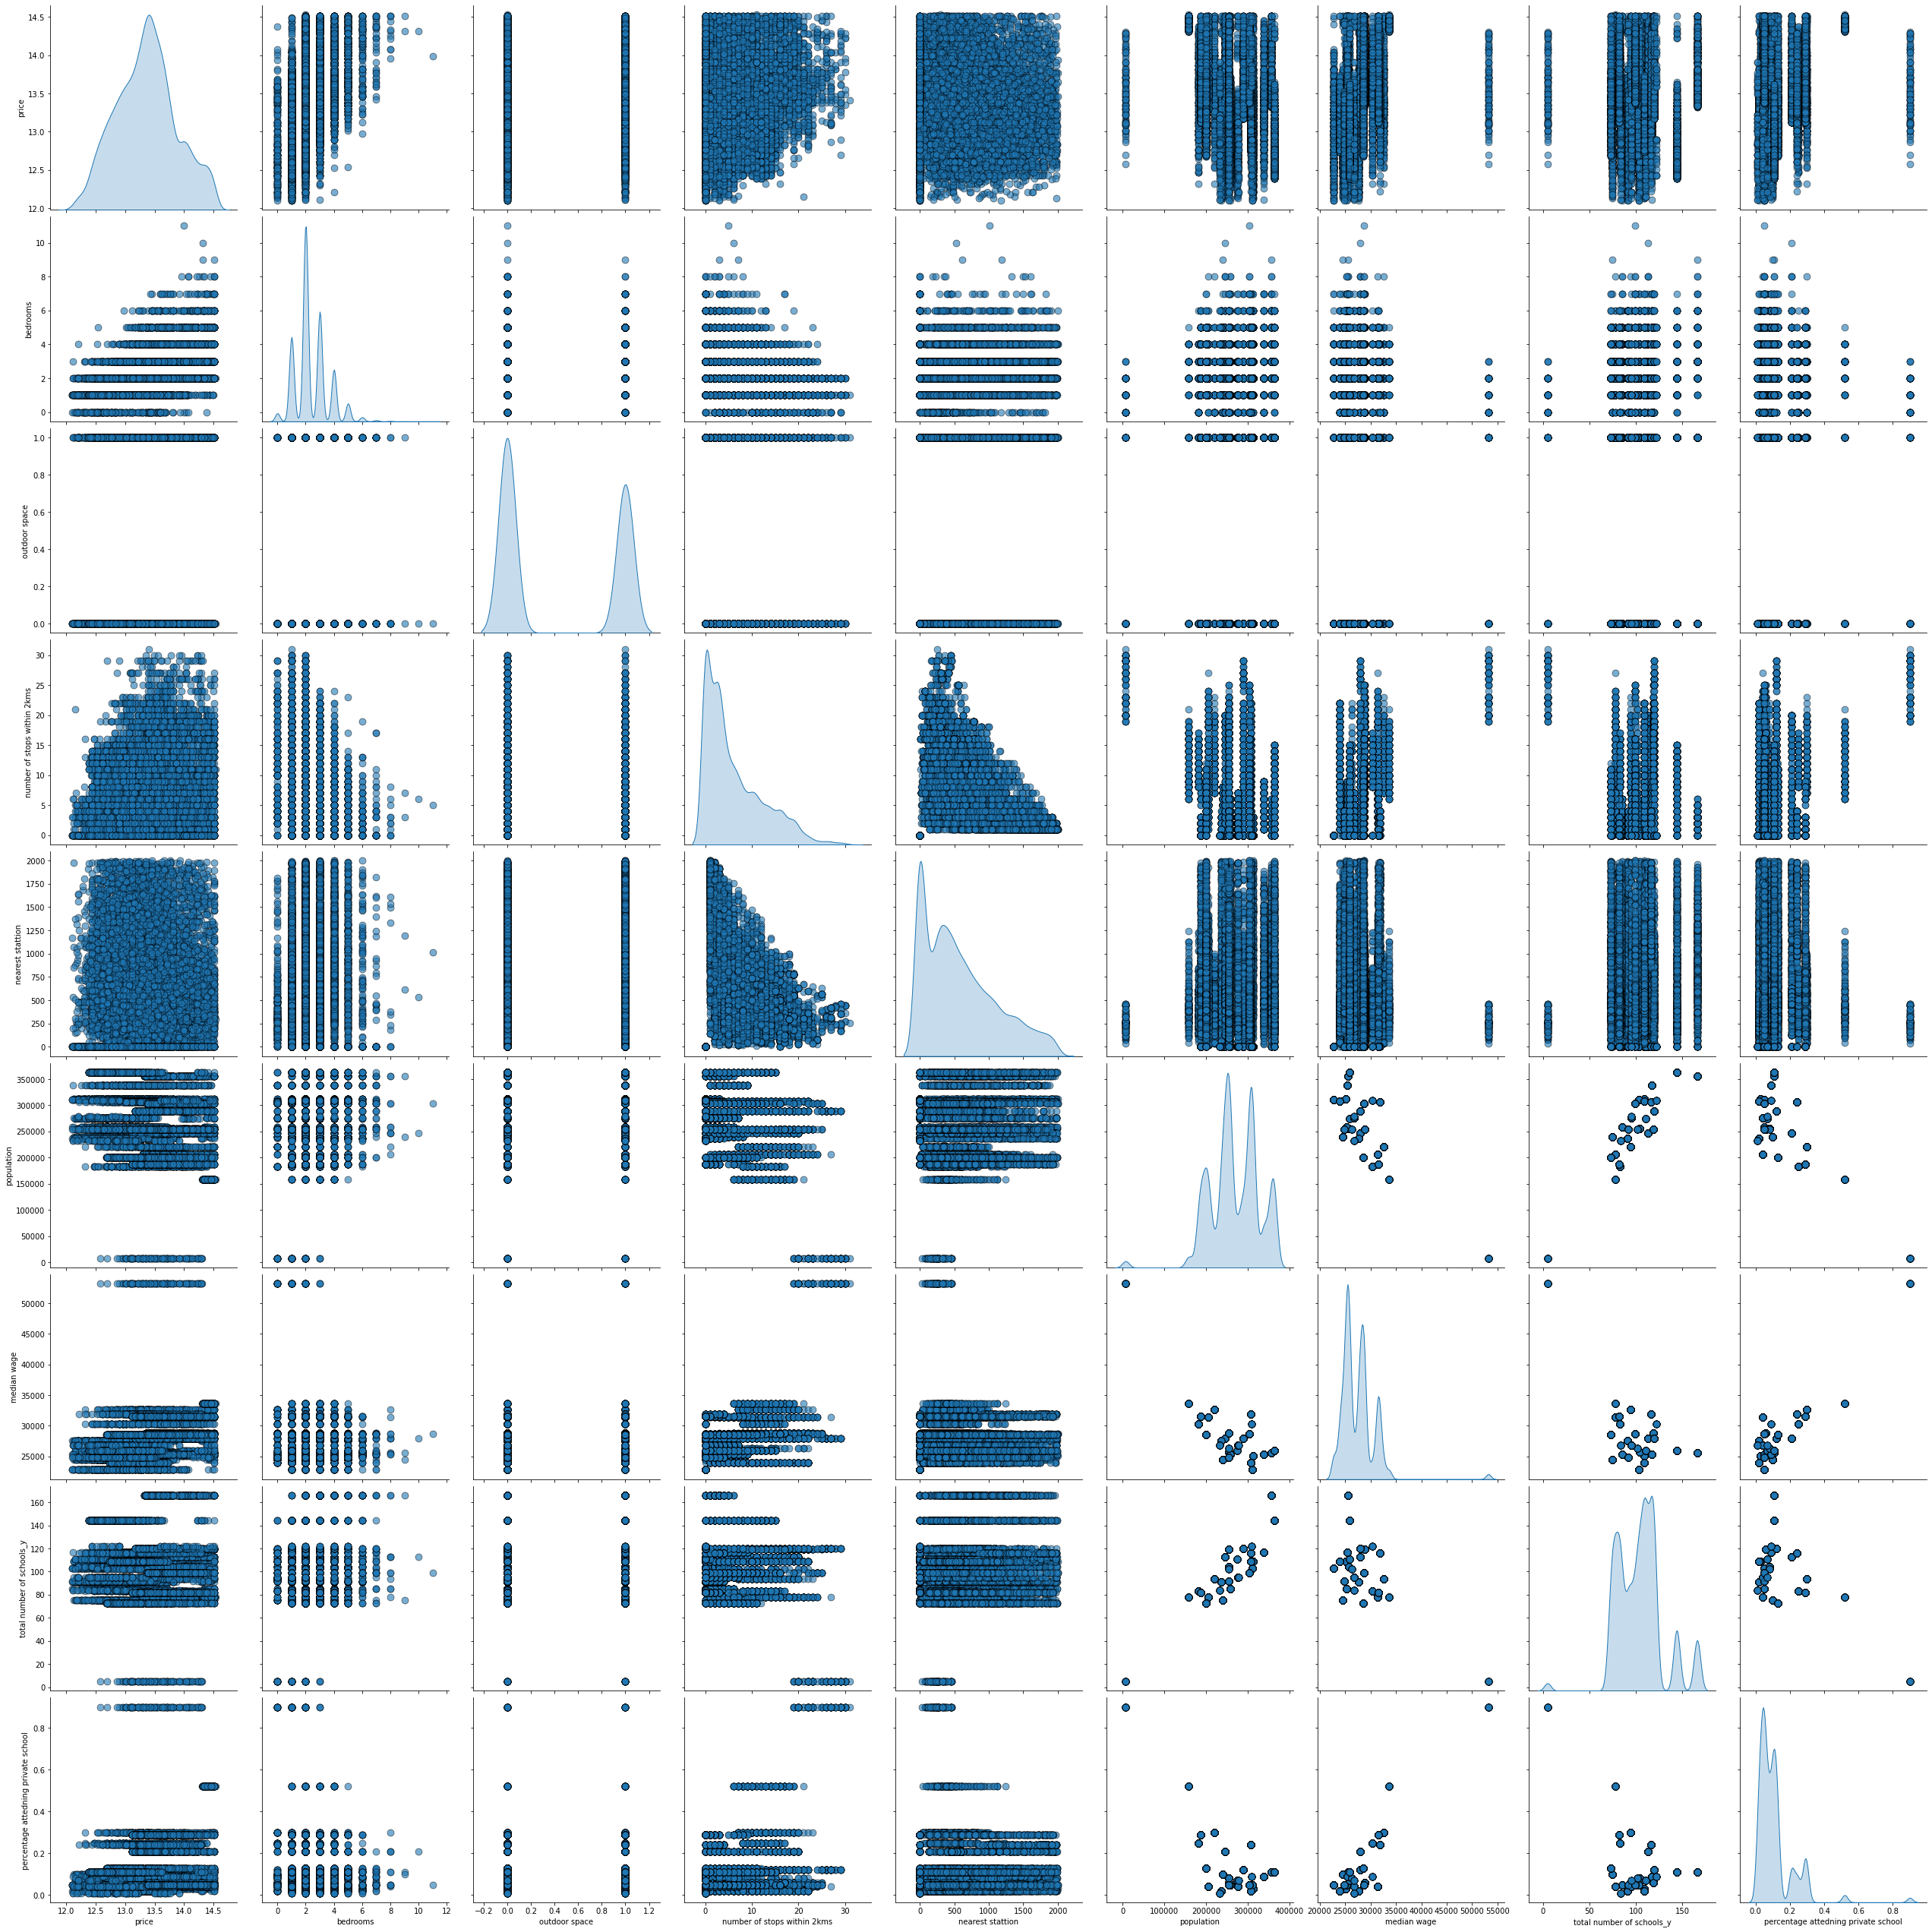

In [539]:
# Lets see the visualization of the relationship between the most correlated features and the response using scatterplots

sns.pairplot(df[['price','bedrooms', 'outdoor space',
                'number of stops within 2kms','nearest stattion', 'population', 'median wage', 'total number of schools_y'
               ,'percentage attedning private school']],diag_kind='kde',plot_kws={'alpha':0.6,'s':80,'edgecolor':'k'},size=4)


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14445 entries, 0 to 14444
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   price                                14445 non-null  int64  
 1   bedrooms                             14445 non-null  int64  
 2   address                              14445 non-null  object 
 3   latitude                             14445 non-null  float64
 4   longitude                            14445 non-null  float64
 5   propertyType                         14445 non-null  object 
 6   summary                              14445 non-null  object 
 7   bourough                             14445 non-null  object 
 8   outdoor space                        14445 non-null  bool   
 9   postcode                             14445 non-null  object 
 10  postcode first section               14443 non-null  object 
 11  nearest stattion            

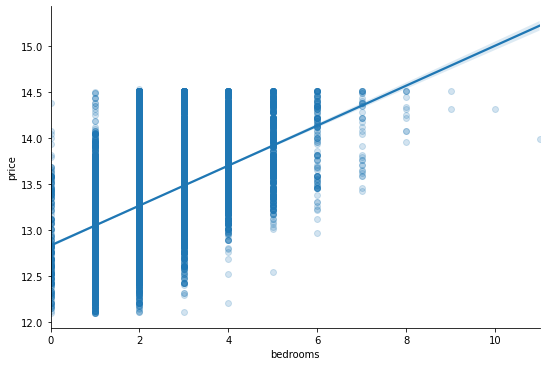

In [540]:
# Seaborn scatter plot with regression line
sns.lmplot(x='bedrooms', y='price', data=df, aspect=1.5, scatter_kws={'alpha':0.2})


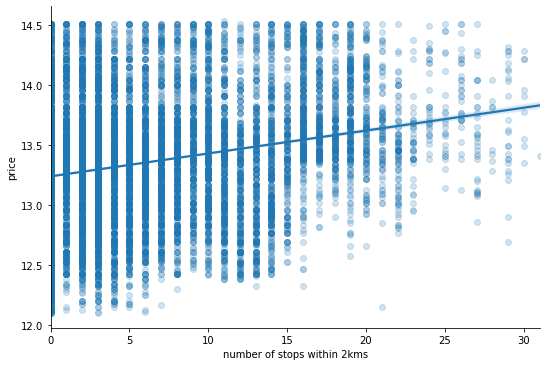

In [541]:
sns.lmplot(x='number of stops within 2kms', y='price', data=df, aspect=1.5, scatter_kws={'alpha':0.2})

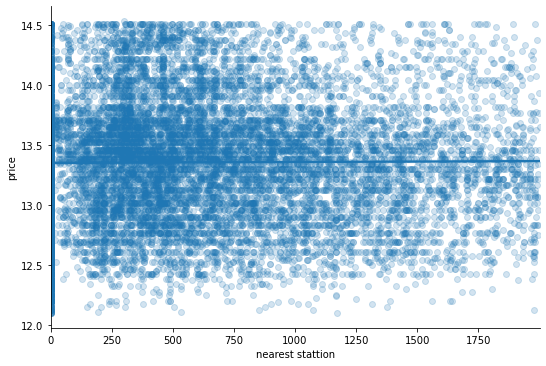

In [542]:
sns.lmplot(x='nearest stattion', y='price', data=df, aspect=1.5, scatter_kws={'alpha':0.2})

In [543]:
df['outdoor space'] = df['outdoor space'].astype(int)
df['outdoor space']

0        1
1        0
2        0
3        0
4        1
        ..
14440    1
14441    1
14442    1
14443    1
14444    0
Name: outdoor space, Length: 14445, dtype: int32

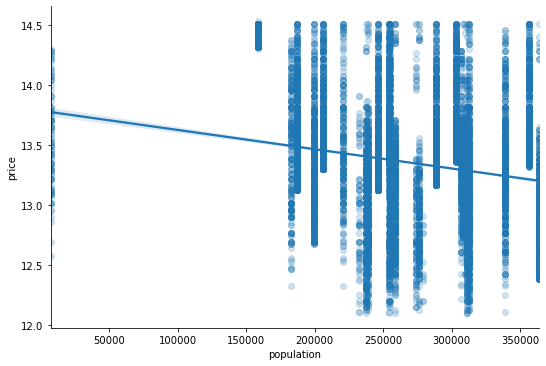

In [544]:
sns.lmplot(x='population', y='price', data=df, aspect=1.5, scatter_kws={'alpha':0.2})

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14445 entries, 0 to 14444
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   price                                14445 non-null  float64
 1   bedrooms                             14445 non-null  int64  
 2   address                              14445 non-null  object 
 3   latitude                             14445 non-null  float64
 4   longitude                            14445 non-null  float64
 5   propertyType                         14445 non-null  object 
 6   summary                              14445 non-null  object 
 7   bourough                             14445 non-null  object 
 8   outdoor space                        14445 non-null  int32  
 9   postcode                             14445 non-null  object 
 10  postcode first section               14443 non-null  object 
 11  nearest stattion            